![title](./pics/dd_logo.png) 


# More on Parsing

In our first example, we parsed a page and looked at the individual components that were returned as a result of the parsing. Now, we will look at another example and demonstrate what other kinds of results can also be displayed.



In [ ]:
import deepdoctection as dd
from pathlib import Path
from matplotlib import pyplot as plt

We begin by instantiating the analyzer, which we configure slightly differently from the default settings. For more detailed information on the configuration, please refer to the corresponding notebook.

In [ ]:
analyzer = dd.get_dd_analyzer(config_overwrite=['USE_LAYOUT_LINK=True'])

Let's choose a machine learning research paper taken from arXiv. 

In [3]:
pdf_path = Path.cwd() / "sample/2312.13560.pdf"
df = analyzer.analyze(path=pdf_path)
df.reset_state() 

In [ ]:
doc=iter(df)
page = next(doc)

You may notice that some `line`s are labeled with the category line. This layout section is artificial and generated by the `analyzer`. Every word recognized by the OCR must be assigned to a layout section. If this is not possible for certain `word`s, they are grouped together and merged into a `line`.

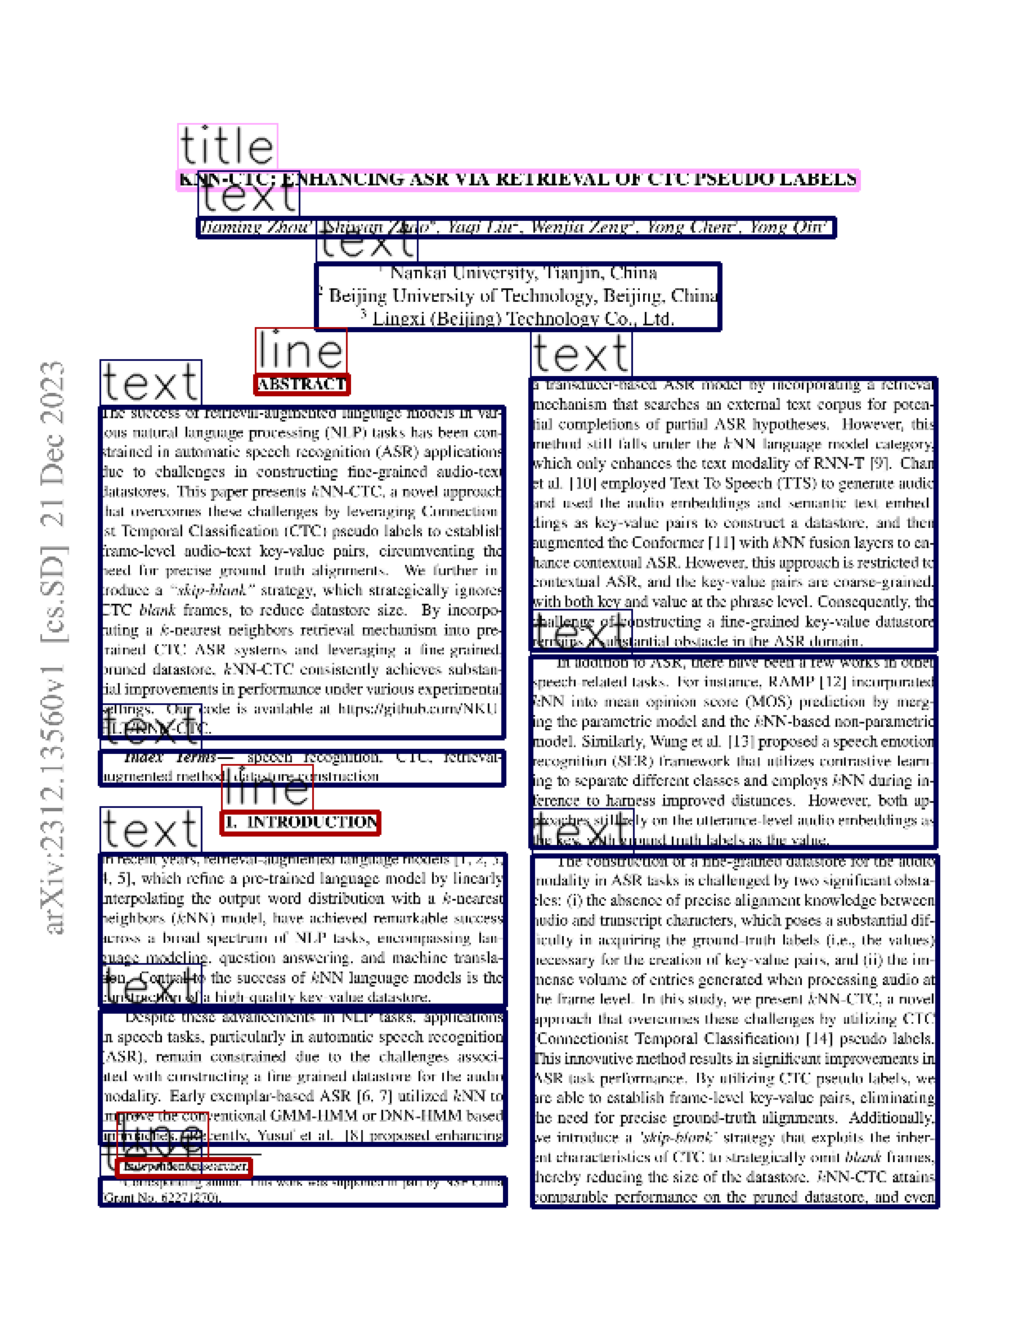

In [5]:
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(page.viz())

In [20]:
for layout in page.layouts: 
    print(f"category_name: {layout.category_name.value}, annotation_id: {layout.annotation_id}")

category_name: text, annotation_id: 45248bd0-268c-373d-b04c-f8188d33c77c
category_name: text, annotation_id: 13cb9477-f605-324a-b497-9f42335c747d
category_name: text, annotation_id: bd761965-ccc1-3183-931d-4756361ee02f
category_name: text, annotation_id: ace5bf6c-ef6f-3501-9af8-31f803a14348
category_name: text, annotation_id: 67b22566-c4fe-3986-9556-12b9596e6805
category_name: text, annotation_id: 13a5f0ea-19e5-3317-b50c-e4c829a73d09
category_name: text, annotation_id: 6528c3d3-c5c2-38d5-9e80-664827479525
category_name: text, annotation_id: 1a94c6e9-2e91-3c48-b589-4bc34656fbd1
category_name: text, annotation_id: bc739f06-fea0-3cbd-be5c-e816c1e95101
category_name: text, annotation_id: b1f9c0b4-a5e1-3141-b42c-e50edeab6d08
category_name: text, annotation_id: 20f7bb66-7ac4-3f1e-b873-f729def42ea4
category_name: list, annotation_id: 07924bd1-cb94-37bf-8256-1193610d5847
category_name: list, annotation_id: d0f8cb8e-0d0e-302b-8e8a-57bfa51e8bfb
category_name: list, annotation_id: 93b7077c-530c-3

The watermark on the left is also noticeable — it is not displayed. However, there are certain layout segments that do not belong to the main body text. These include elements such as tables, as shown in the first notebook. Additionally, there are residual_layouts like page_header and page_footer. These special layout sections can be displayed if needed.

In [7]:
[layout.category_name.value for layout in page.residual_layouts]

['page_header', 'page_footer']

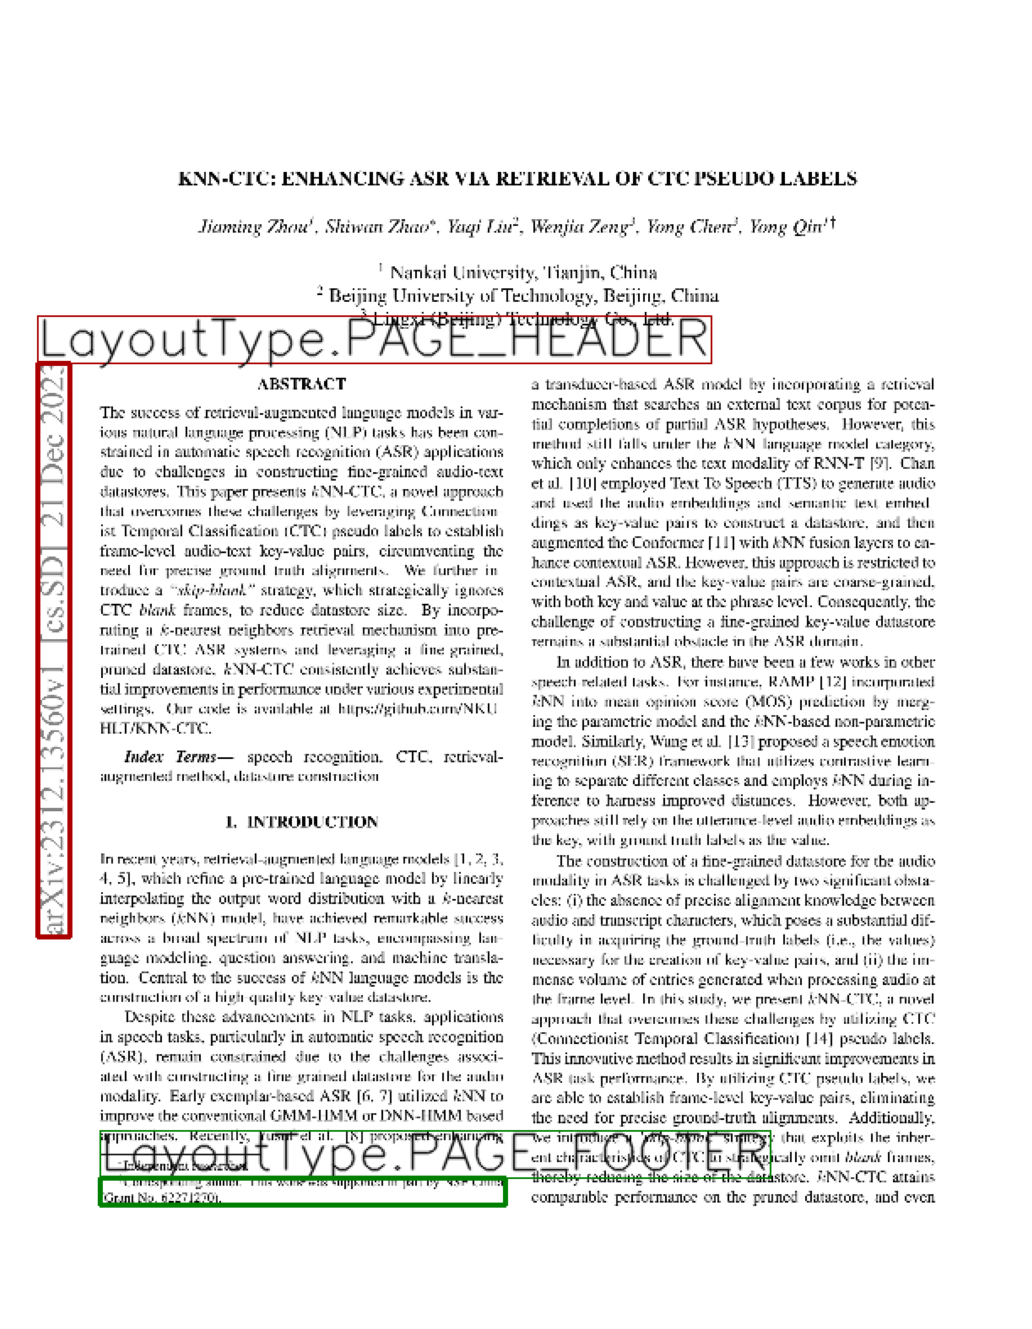

In [8]:
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(page.viz(page_header="category_name",page_footer="category_name")) # pass the layout section`s 
# category_name as argument. It`s value is the value we want to display, in this case it`s category_name. 
# You can also display other attributes, e.g. annotation_id.

The **deep**doctection reading order algorithm is rule-based but can handle various layout types, such as multi-column layouts. However, there are also page layouts where determining the correct reading order fails.

In [9]:
print(page.text)

KNN-CTC: ENHANCING ASR VIA RETRIEVAL OF CTC PSEUDO LABELS
Jiaming Zhou', Shiwan Zhao*, Yaqi Liu, Wenjia Zengs, Yong Chen, Yong Qin't
Nankai University, Tianjin, China 2 Beijing University of Technology, Beijing, China 3 Lingxi (Beijing) Technology Co., Ltd.
ABSTRACT
The success of retrieval-augmented language models in var- ious natural language processing (NLP) tasks has been con- strained in automatic speech recognition (ASR) applications due to challenges in constructing fine-grained audio-text datastores. This paper presents KNN-CTC, a novel approach that overcomes these challenges by leveraging Connection- ist Temporal Classification (CTC) pseudo labels to establish frame-level audio-text key-value pairs, circumventing the need for precise ground truth alignments. We further in- troduce a "skip-blank" strategy, which strategically ignores CTC blank frames, to reduce datastore size. By incorpo- rating a k-nearest neighbors retrieval mechanism into pre- trained CTC ASR systems and l

We can detect figures...

In [ ]:
page = next(doc)
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(page.viz(figure="category_name"))

... and captions.

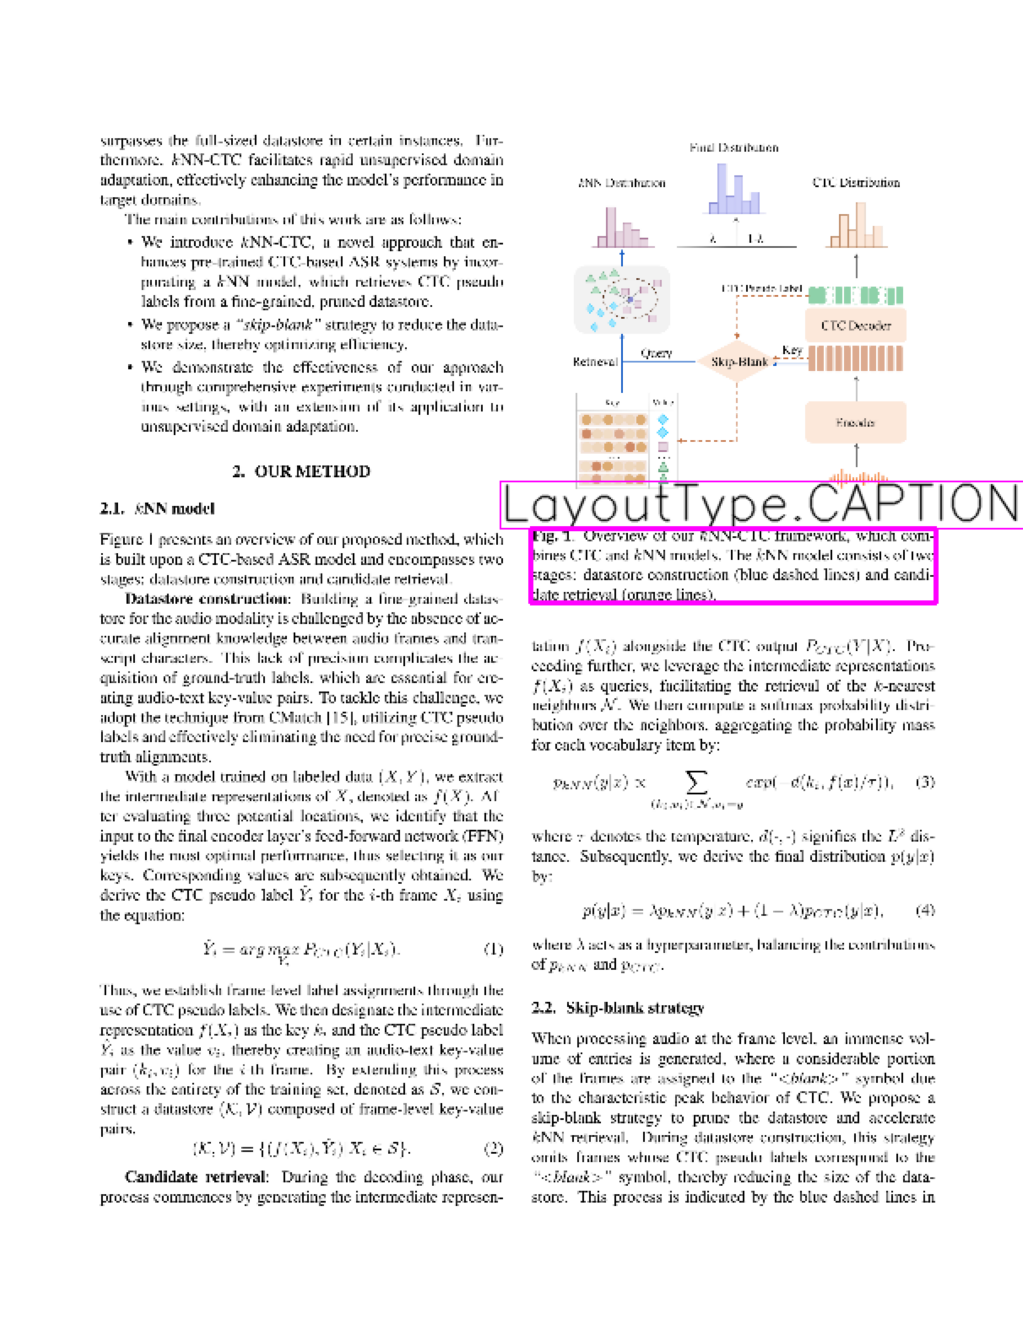

In [11]:
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(page.viz(caption="category_name"))

Figure type layout segments have their own attributes: 

In [12]:
figure = page.figures[0]

`figure.image.viz()` returns a NumPy array containing the image segment enclosed by the bounding box.

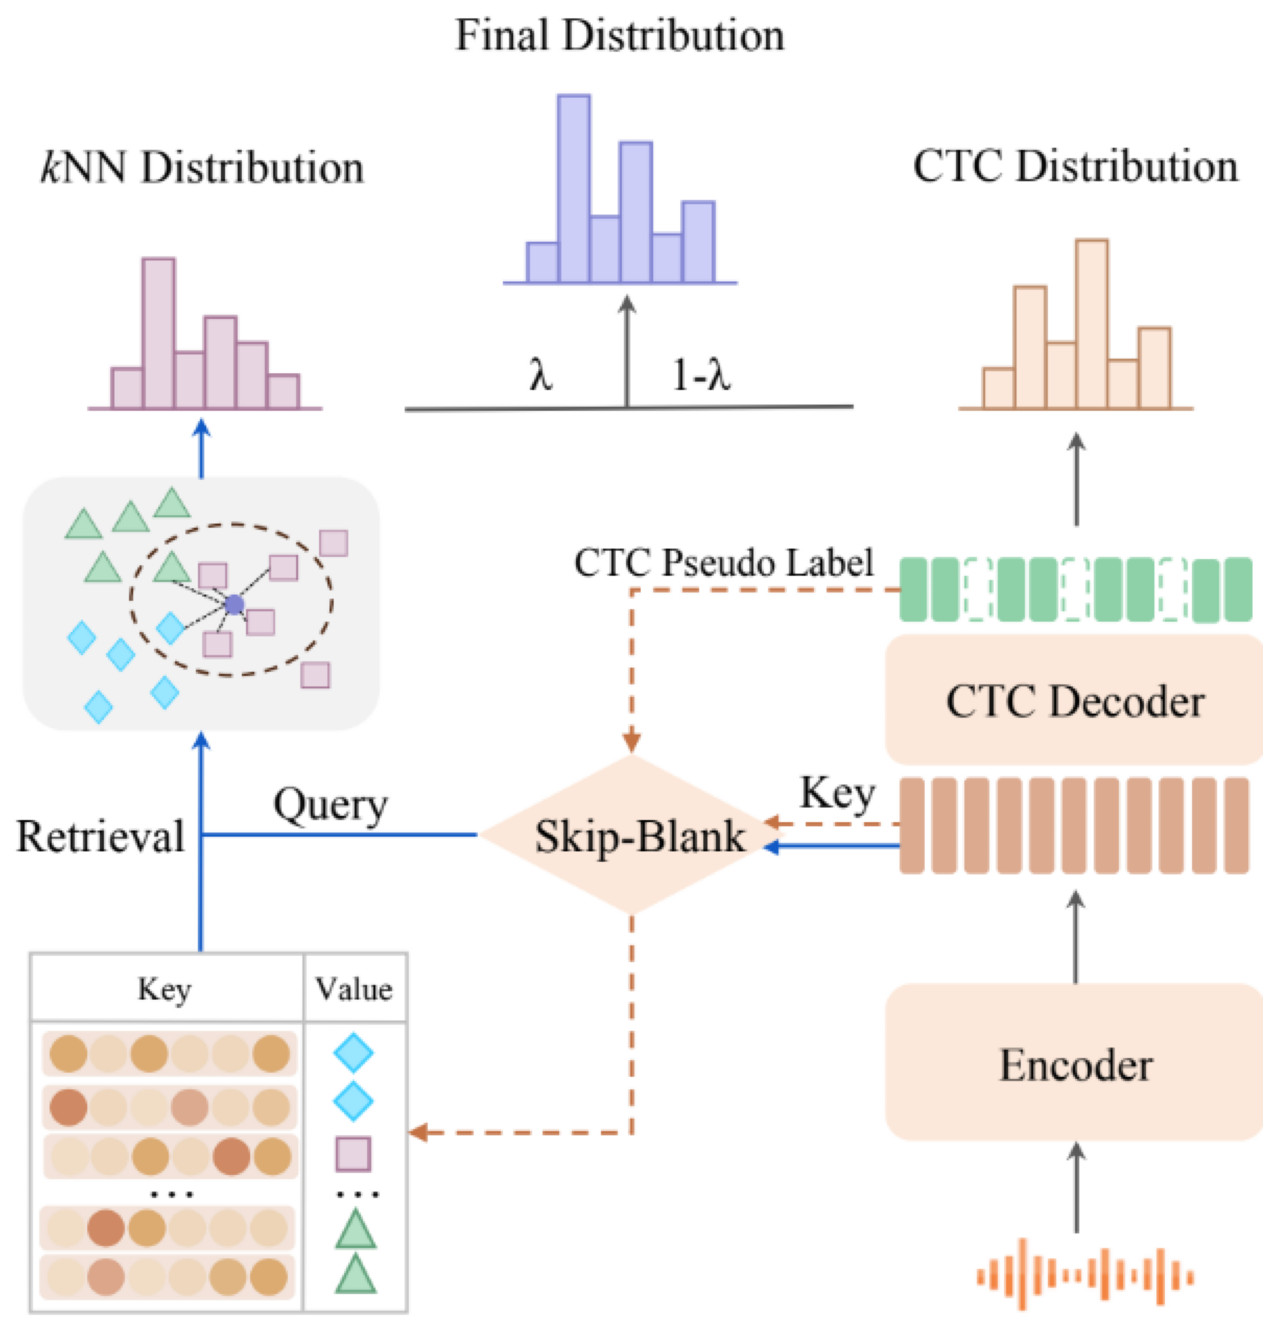

In [44]:
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(figure.image.viz())

This makes it easy to store layout sections under a unique ID.

In [ ]:
dd.viz_handler.write_image(f"/path/to/dir/{figure.annotation_id}.png",figure.image.image)

Let’s return to our configuration. By setting `USE_LAYOUT_LINK=True`, we enabled a component that links `caption`s to `table`s or `figure`s. The linking is rule-based: if a `table` or `figure` is present, a `caption` is associated with the nearest one in terms of spatial proximity.

In [19]:
for caption in figure.layout_link:
    print(f"annotation_id: {caption.annotation_id}, text: {caption.text}")

text: Fig. 1. Overview of our KNN-CTC framework, which com- bines CTC and KNN models. The KNN model consists of two stages: datastore construction (blue dashed lines) and candi- date retrieval (orange lines)., annotation_id: 46bd4e42-8d50-30fb-883a-6c4d82b236af


We conclude our tutorial with some special features. Suppose you have a specific layout segment. Using get_layout_context, you can retrieve the surrounding layout segments within a given context_size, i.e., the k layout segments that appear before and after it in the reading order.

In [23]:
for layout in page.get_layout_context(annotation_id="13a5f0ea-19e5-3317-b50c-e4c829a73d09",context_size=1):
    print("-----------------")
    print(f"annotation_id: {layout.annotation_id}, text: {layout.text}")

-----------------
annotation_id: 40d63bea-9815-3e97-906f-76b501c67667, text: (2)
-----------------
annotation_id: 13a5f0ea-19e5-3317-b50c-e4c829a73d09, text: Candidate retrieval: During the decoding phase, our process commences by generating the intermediate represen-
-----------------
annotation_id: 13cb9477-f605-324a-b497-9f42335c747d, text: tation f(Xi) alongside the CTC output PCTC(YIx). Pro- ceeding further, we leverage the intermediate representations f(Xi) as queries, facilitating the retrieval of the k-nearest neighbors N. We then compute a softmax probability distri- bution over the neighbors, aggregating the probability mass for each vocabulary item by:


What does the analyzer predict? 

We can use the meta annotations to find out which attributes are determined for which object types. The attribute image_annotations represent all layout segments constructed by the analyzer. Ultimately, `ImageAnnotation`s are everything that can be enclosed by a bounding box. 

In [35]:
meta_annotations = analyzer.get_meta_annotation()
meta_annotations.image_annotations

(<DefaultType.DEFAULT_TYPE>,
 <LayoutType.CAPTION>,
 <LayoutType.TEXT>,
 <LayoutType.TITLE>,
 <LayoutType.FOOTNOTE>,
 <LayoutType.FORMULA>,
 <LayoutType.LIST_ITEM>,
 <LayoutType.PAGE_FOOTER>,
 <LayoutType.PAGE_HEADER>,
 <LayoutType.FIGURE>,
 <LayoutType.SECTION_HEADER>,
 <LayoutType.TABLE>,
 <LayoutType.COLUMN>,
 <LayoutType.ROW>,
 <CellType.COLUMN_HEADER>,
 <CellType.PROJECTED_ROW_HEADER>,
 <CellType.SPANNING>,
 <LayoutType.WORD>,
 <LayoutType.LINE>)

The `sub_categories` represent attributes associated with specific `ImageAnnotations`. For a table cell, for example, these include: <CellType.COLUMN_NUMBER>, <CellType.COLUMN_SPAN>, <CellType.ROW_NUMBER> and <CellType.ROW_SPAN>. 

In [36]:
meta_annotations.sub_categories

{<LayoutType.CELL>: {<CellType.COLUMN_NUMBER>,
  <CellType.COLUMN_SPAN>,
  <CellType.ROW_NUMBER>,
  <CellType.ROW_SPAN>},
 <CellType.SPANNING>: {<CellType.COLUMN_NUMBER>,
  <CellType.COLUMN_SPAN>,
  <CellType.ROW_NUMBER>,
  <CellType.ROW_SPAN>},
 <CellType.ROW_HEADER>: {<CellType.COLUMN_NUMBER>,
  <CellType.COLUMN_SPAN>,
  <CellType.ROW_NUMBER>,
  <CellType.ROW_SPAN>},
 <CellType.COLUMN_HEADER>: {<CellType.COLUMN_NUMBER>,
  <CellType.COLUMN_SPAN>,
  <CellType.ROW_NUMBER>,
  <CellType.ROW_SPAN>},
 <CellType.PROJECTED_ROW_HEADER>: {<CellType.COLUMN_NUMBER>,
  <CellType.COLUMN_SPAN>,
  <CellType.ROW_NUMBER>,
  <CellType.ROW_SPAN>},
 <LayoutType.ROW>: {<CellType.ROW_NUMBER>},
 <LayoutType.COLUMN>: {<CellType.COLUMN_NUMBER>},
 <LayoutType.WORD>: {<WordType.CHARACTERS>, <Relationships.READING_ORDER>},
 <LayoutType.TEXT>: {<Relationships.READING_ORDER>},
 <LayoutType.TITLE>: {<Relationships.READING_ORDER>},
 <LayoutType.LIST>: {<Relationships.READING_ORDER>},
 <LayoutType.KEY_VALUE_AREA>: {<R

The relationships represent one or more relations between different `ImageAnnotation`s. 

In [37]:
meta_annotations.relationships

{<LayoutType.TABLE>: {<Relationships.CHILD>, <Relationships.LAYOUT_LINK>},
 <LayoutType.TABLE_ROTATED>: {<Relationships.CHILD>},
 <LayoutType.TEXT>: {<Relationships.CHILD>},
 <LayoutType.TITLE>: {<Relationships.CHILD>},
 <LayoutType.LIST_ITEM>: {<Relationships.CHILD>},
 <LayoutType.LIST>: {<Relationships.CHILD>},
 <LayoutType.CAPTION>: {<Relationships.CHILD>},
 <LayoutType.PAGE_HEADER>: {<Relationships.CHILD>},
 <LayoutType.PAGE_FOOTER>: {<Relationships.CHILD>},
 <LayoutType.PAGE_NUMBER>: {<Relationships.CHILD>},
 <LayoutType.MARK>: {<Relationships.CHILD>},
 <LayoutType.KEY_VALUE_AREA>: {<Relationships.CHILD>},
 <LayoutType.FIGURE>: {<Relationships.CHILD>, <Relationships.LAYOUT_LINK>},
 <CellType.SPANNING>: {<Relationships.CHILD>},
 <LayoutType.CELL>: {<Relationships.CHILD>}}

The summaries describe facts presented at the page level — for instance, a `document_type`. This pipeline does not have a document type classifier.

In [38]:
meta_annotations.summaries

()

By the way, don’t be confused by the obscure way the different categories are displayed. The categories are specific enum members. Each enum member can be converted into a string type, and vice versa — a string type can be converted back into an enum member:

In [41]:
dd.LayoutType.CELL, dd.LayoutType.CELL.value, dd.get_type('cell')

(<LayoutType.CELL>, 'cell', <LayoutType.CELL>)